In [1]:
import numpy as np

# Pré-requis

Regardez les sources suivantes:  

- la documentation de numpy sur le broadcast https://numpy.org/doc/stable/user/basics.broadcasting.html ;
- le chapitre de Vanderplas sur le même sujet https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html


# Jouer avec des points

On considère $Y$ les points sur la droite aux valeurs  1, 3, 7, 2 (c'est juste un vecteur).

In [2]:
Y = np.array([1, 3, 7, 2])

On va calculer toute les différences entre ces valeurs. On construit un matrice `M` telle que `M[i,j] = Y[i] - Y[j]` et `i` et `j` sont deux indices pour tous les identifiants de points possibles. Pour cela, on peut utiliser le broadcasting... 

On constuit `Y - Y.T`, mais il faut transformer le vecteurs 1d `Y` en matrices `a` et `b` de taille (4, 1) et (1, 4)

In [3]:
a, b = Y.reshape(4, 1), Y.reshape(1, 4)
a-b

array([[ 0, -2, -6, -1],
       [ 2,  0, -4,  1],
       [ 6,  4,  0,  5],
       [ 1, -1, -5,  0]])

Une autre façon de procéder est d'ajouter un axe avec `np.newaxis`. Observer `Y[:, np.newaxis]`. En déduire comment construire `a` et `b` autrement.

In [4]:
a, b = Y[:, np.newaxis], Y
a-b

array([[ 0, -2, -6, -1],
       [ 2,  0, -4,  1],
       [ 6,  4,  0,  5],
       [ 1, -1, -5,  0]])

On peut calculer les distances au carré de chaque point vers chaque autre point.

In [5]:
(a-b)**2

array([[ 0,  4, 36,  1],
       [ 4,  0, 16,  1],
       [36, 16,  0, 25],
       [ 1,  1, 25,  0]], dtype=int32)

Quel est le point le plus proche de chaque point ? Regardez la documentation de `np.argsort`. Voyez par exemple 

    np.argsort(np.array([1, 0, 12, 2]))
    
Appliquez cela sur la matrice des distance en prenant le bon axe!

In [6]:
np.argsort((a-b)**2)

array([[0, 3, 1, 2],
       [1, 3, 0, 2],
       [2, 1, 3, 0],
       [3, 0, 1, 2]], dtype=int64)

On recommence avec maintenant des points en dimension 2. On va alors calculer toutes les distances au carré entre ces points.  

Tirer aléatoirement $X$, un jeu de données de 10 points dans $[0, 1]^2$. On utilise `np.random.rand`.

In [7]:
np.random.seed(17)
X = np.random.rand(10,2)
X

array([[0.294665  , 0.53058676],
       [0.19152079, 0.06790036],
       [0.78698546, 0.65633352],
       [0.6375209 , 0.57560289],
       [0.03906292, 0.3578136 ],
       [0.94568319, 0.06004468],
       [0.8640421 , 0.87729053],
       [0.05119367, 0.65241862],
       [0.55175137, 0.59751325],
       [0.48352862, 0.28298816]])

On peut les tracer sur un petit diagramme.

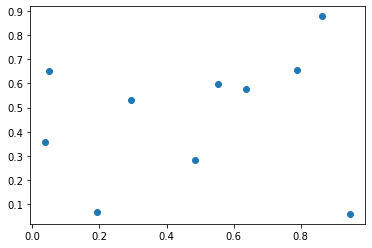

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

Dans `X` la première dimension représente le numéro du point et la deuxième dimension les coordonnées de ce point ($x_1$, $x_2$). 

Maintenant on calcule les `a` et `b` comme tout à l'heure. On ajoute une dimension pour créer un objet en 3 dimensions ($n1=10$, $n2=10$, $x$) à partir de $X$ qui était en dimensions $n=10$ et $x=2$. 

Par la somme ou la différence, on aura dans a[i, j, k] - b[i, j, k] = X[i, k] - X[j, k] 

In [9]:
a, b = X[:,np.newaxis,:], X[np.newaxis,:,:]
c = a-b
c

array([[[ 0.        ,  0.        ],
        [ 0.10314422,  0.4626864 ],
        [-0.49232046, -0.12574677],
        [-0.34285589, -0.04501614],
        [ 0.25560209,  0.17277315],
        [-0.65101818,  0.47054208],
        [-0.5693771 , -0.34670377],
        [ 0.24347134, -0.12183186],
        [-0.25708637, -0.0669265 ],
        [-0.18886362,  0.24759859]],

       [[-0.10314422, -0.4626864 ],
        [ 0.        ,  0.        ],
        [-0.59546467, -0.58843316],
        [-0.44600011, -0.50770254],
        [ 0.15245787, -0.28991325],
        [-0.7541624 ,  0.00785568],
        [-0.67252132, -0.80939017],
        [ 0.14032712, -0.58451826],
        [-0.36023058, -0.5296129 ],
        [-0.29200784, -0.2150878 ]],

       [[ 0.49232046,  0.12574677],
        [ 0.59546467,  0.58843316],
        [ 0.        ,  0.        ],
        [ 0.14946456,  0.08073063],
        [ 0.74792254,  0.29851992],
        [-0.15869773,  0.59628884],
        [-0.07705664, -0.220957  ],
        [ 0.73579179,  0

On peut calculer la différence au carré pour chaque coordonnée. 

In [10]:
c = c**2
c

array([[[0.00000000e+00, 0.00000000e+00],
        [1.06387292e-02, 2.14078702e-01],
        [2.42379433e-01, 1.58122492e-02],
        [1.17550164e-01, 2.02645269e-03],
        [6.53324266e-02, 2.98505617e-02],
        [4.23824676e-01, 2.21409845e-01],
        [3.24190283e-01, 1.20203505e-01],
        [5.92782920e-02, 1.48430021e-02],
        [6.60933996e-02, 4.47915609e-03],
        [3.56694676e-02, 6.13050641e-02]],

       [[1.06387292e-02, 2.14078702e-01],
        [0.00000000e+00, 0.00000000e+00],
        [3.54578177e-01, 3.46253588e-01],
        [1.98916097e-01, 2.57761865e-01],
        [2.32434024e-02, 8.40496904e-02],
        [5.68760925e-01, 6.17116749e-05],
        [4.52284921e-01, 6.55112444e-01],
        [1.96917010e-02, 3.41661593e-01],
        [1.29766072e-01, 2.80489819e-01],
        [8.52685771e-02, 4.62627629e-02]],

       [[2.42379433e-01, 1.58122492e-02],
        [3.54578177e-01, 3.46253588e-01],
        [0.00000000e+00, 0.00000000e+00],
        [2.23396559e-02, 6.517

La distance au carré est la somme pour toutes ces coordonnées. Donc la somme sur la troisième composante. 

In [11]:
dist = np.sum(c, axis=2)
dist

array([[0.        , 0.22471743, 0.25819168, 0.11957662, 0.09518299,
        0.64523452, 0.44439379, 0.07412129, 0.07057256, 0.09697453],
       [0.22471743, 0.        , 0.70083176, 0.45667796, 0.10729309,
        0.56882264, 1.10739737, 0.36135329, 0.41025589, 0.13153134],
       [0.25819168, 0.70083176, 0.        , 0.02885709, 0.64850227,
        0.38074535, 0.05475972, 0.54140489, 0.0587949 , 0.23147281],
       [0.11957662, 0.45667796, 0.02885709, 0.        , 0.40558413,
        0.36076427, 0.14232728, 0.34968028, 0.00783648, 0.109337  ],
       [0.09518299, 0.10729309, 0.64850227, 0.40558413, 0.        ,
        0.91062665, 0.95044693, 0.08693927, 0.32030537, 0.20314861],
       [0.64523452, 0.56882264, 0.38074535, 0.36076427, 0.91062665,
        0.        , 0.67455604, 1.15101838, 0.44405474, 0.26329064],
       [0.44439379, 1.10739737, 0.05475972, 0.14232728, 0.95044693,
        0.67455604, 0.        , 0.71128996, 0.17580083, 0.49798581],
       [0.07412129, 0.36135329, 0.5414048

Quels 2 points les plus proches du point 0 ?  On peut utiliser `np.argsort` sur les distances au premier point... 

In [12]:
np.argsort(dist)

array([[0, 8, 7, 4, 9, 3, 1, 2, 6, 5],
       [1, 4, 9, 0, 7, 8, 3, 5, 2, 6],
       [2, 3, 6, 8, 9, 0, 5, 7, 4, 1],
       [3, 8, 2, 9, 0, 6, 7, 5, 4, 1],
       [4, 7, 0, 1, 9, 8, 3, 2, 5, 6],
       [5, 9, 3, 2, 8, 1, 0, 6, 4, 7],
       [6, 2, 3, 8, 0, 9, 5, 7, 4, 1],
       [7, 0, 4, 8, 9, 3, 1, 2, 6, 5],
       [8, 3, 2, 0, 9, 6, 7, 4, 1, 5],
       [9, 0, 8, 3, 1, 4, 2, 5, 7, 6]], dtype=int64)

In [13]:
i = 0
for n in np.argsort(dist)[:, 1]:
    print(f"{X[n,:]} est le point le plus proche de {X[i,:]} (dist = {round(dist[i,n], 3)})")
    i += 1

[0.55175137 0.59751325] est le point le plus proche de [0.294665   0.53058676] (dist = 0.071)
[0.03906292 0.3578136 ] est le point le plus proche de [0.19152079 0.06790036] (dist = 0.107)
[0.6375209  0.57560289] est le point le plus proche de [0.78698546 0.65633352] (dist = 0.029)
[0.55175137 0.59751325] est le point le plus proche de [0.6375209  0.57560289] (dist = 0.008)
[0.05119367 0.65241862] est le point le plus proche de [0.03906292 0.3578136 ] (dist = 0.087)
[0.48352862 0.28298816] est le point le plus proche de [0.94568319 0.06004468] (dist = 0.263)
[0.78698546 0.65633352] est le point le plus proche de [0.8640421  0.87729053] (dist = 0.055)
[0.294665   0.53058676] est le point le plus proche de [0.05119367 0.65241862] (dist = 0.074)
[0.6375209  0.57560289] est le point le plus proche de [0.55175137 0.59751325] (dist = 0.008)
[0.294665   0.53058676] est le point le plus proche de [0.48352862 0.28298816] (dist = 0.097)


# Autres méthodes

In [14]:
X = X.reshape(2, 10)
a2 = X[:,:,np.newaxis]
b2 = X[:,np.newaxis,:]
c2 = (a-b)**2
dist2 = np.sum(c2, axis=2)
np.linalg.norm(dist2-dist) < 1e-10

True